# Declarações

In [1]:
!pip install basedosdados
import basedosdados as bd
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import scipy.stats as sp

# ENEM para IDEB

## Importando base de dados

In [7]:
enem_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019.csv', sep = ',',
                        usecols = ['treineiro', 'nota_lc', 'nota_mt', 'nota_redacao', 'estado'],
                        skiprows = lambda i: i > 0 and random.random() > 0.1)

## Removendo treineiros

In [8]:
enem_2019 = enem_2019.drop(enem_2019[enem_2019.treineiro == 1].index) #removendo os treineiros ;)
enem_2019.query('treineiro == 1')

,treineiro,nota_lc,nota_mt,nota_redacao,estado


In [9]:
enem_2019.drop(columns = 'treineiro', inplace = True)
enem_2019.sample(10)

,nota_lc,nota_mt,nota_redacao,estado
15643,503.6,431.4,420.0,CE
248429,344.3,433.0,500.0,BA
168187,439.5,390.8,0.0,MS
213821,562.0,435.6,960.0,ES
41222,560.0,451.5,580.0,SE
333566,532.2,458.9,700.0,SP
255211,504.1,550.5,580.0,MG
430066,582.2,600.0,640.0,SP
22938,502.8,410.6,600.0,BA
64355,NaN,NaN,NaN,MG


## Exportando a base de dados tratada

In [10]:
enem_2019.dropna(inplace = True)
enem_2019.describe()
enem_2019.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_ideb.csv',
                           sep=';', index=False, encoding='utf-8-sig')

## Importando base de dados tratada

In [32]:
enem_2019_ideb = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_ideb.csv',
                           sep=';', encoding='utf-8-sig')
enem_2019_ideb.head(5)

,nota_lc,nota_mt,nota_redacao,estado
0,488.7,516.5,540.0,PA
1,541.8,631.3,640.0,PA
2,528.0,418.5,580.0,PA
3,528.2,517.9,680.0,PA
4,438.2,599.7,560.0,PA


## Organizando por estado e deixando apropriado para comparar com a base do IDEB

In [33]:
enem_2019_ideb_uf = enem_2019_ideb.groupby('estado')
enem_2019_ideb_uf.mean()

,nota_lc,nota_mt,nota_redacao
estado,,,
AC,502.959660,481.678524,546.061360
AL,502.646440,497.413220,564.175182
AM,500.023212,479.153576,517.409699
AP,498.279222,474.106407,546.525926
BA,510.662447,499.434100,565.831252
CE,512.764849,515.344142,570.509892
DF,536.482711,533.402312,595.947820
ES,527.783575,537.960346,597.307087
GO,523.158987,523.561035,588.508161


In [34]:
df_enem_2019_ideb_uf = enem_2019_ideb_uf.mean().reset_index()
df_enem_2019_ideb_uf.rename(columns={'estado': 'sigla_uf'}, inplace=True)
df_enem_2019_ideb_uf

,sigla_uf,nota_lc,nota_mt,nota_redacao
0,AC,502.959660,481.678524,546.061360
1,AL,502.646440,497.413220,564.175182
2,AM,500.023212,479.153576,517.409699
3,AP,498.279222,474.106407,546.525926
4,BA,510.662447,499.434100,565.831252
5,CE,512.764849,515.344142,570.509892
6,DF,536.482711,533.402312,595.947820
7,ES,527.783575,537.960346,597.307087
8,GO,523.158987,523.561035,588.508161
9,MA,496.295314,482.529771,542.997726


# IDEB


## Importando a base do IDEB

In [2]:
ideb_uf = bd.read_table(dataset_id='br_inep_ideb', table_id='uf', billing_project_id="analytica-desigualdade")
ideb_uf.head(5)

Downloading: 100%|██████████| 2629/2629 [00:00<00:00, 3282.65rows/s]


,ano,sigla_uf,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,estadual,fundamental,finais (6-9),82.9,0.834163,224.91,227.27,4.202988,3.5,NaN
1,2005,AC,estadual,fundamental,iniciais (1-5),78.4,0.789825,169.19,166.80,4.229711,3.3,NaN
2,2005,AC,estadual,medio,todos (1-4),72.7,0.770317,249.88,245.24,3.870503,3.0,NaN
3,2005,AC,privada,fundamental,finais (6-9),95.9,0.958336,256.67,257.54,5.236878,5.0,NaN
4,2005,AC,privada,fundamental,iniciais (1-5),98.9,0.988218,212.82,203.67,5.728825,5.7,NaN


## Tratando os dados

In [14]:
#H0: Taxa de aprovação é igual a indicador de rendimento
#h1: Taxa de aprovação é diferente de indicador de rendimento
_, p_valor = sp.mannwhitneyu(ideb_uf.taxa_aprovacao, ideb_uf.indicador_rendimento)
if p_valor <= 0.05: #Se p valor for menor que 0.05, rejeitamos a H0
    print("Taxa de aprovação é diferente de indicador de rendimento")
else:
    print("Taxa de aprovação é igual a indicador de rendimento")
print(p_valor)

Taxa de aprovação é diferente de indicador de rendimento
0.0


In [ ]:
ideb_uf.drop(columns = "indicador_rendimento", inplace = True) #é a mesma coisa que a taxa de aprovação!

In [ ]:
ideb_uf_2019 = ideb_uf.query("ano == 2019").drop(columns = 'ano')
ideb_2019_total = ideb_uf_2019.query("rede == 'total'").drop(columns = 'rede')
ideb_2019_fundamentalI = ideb_2019_total.query("anos_escolares == 'finais (6-9)'").drop(columns = ['anos_escolares', 'ensino'])
ideb_2019_fundamentalII = ideb_2019_total.query("anos_escolares == 'iniciais (1-5)'").drop(columns = ['anos_escolares', 'ensino'])
ideb_2019_medio = ideb_2019_total.query("anos_escolares == 'todos (1-4)'").drop(columns = ['anos_escolares', 'ensino'])

## Exportando as base de dados tratadas

In [ ]:
ideb_2019_fundamentalI.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_fundamentalI_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')
ideb_2019_fundamentalII.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_fundamentalII_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')
ideb_2019_medio.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_medio_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')

## Importando as bases de dados tratadas

In [15]:
ideb_2019_fundamentalI = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_fundamentalI_2019.csv',
                                     sep=';')
ideb_2019_fundamentalII = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_fundamentalII_2019.csv',
                           sep=';')
ideb_2019_medio = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_medio_2019.csv',
                           sep=';')

# Unindo os datasets

In [35]:
ideb_2019_fundamentalI_mat  = ideb_2019_fundamentalI.loc[:, ['sigla_uf', 'nota_saeb_matematica']].reset_index().drop(columns = 'index')
ideb_2019_fundamentalII_mat = ideb_2019_fundamentalII.loc[:, ['sigla_uf', 'nota_saeb_matematica']].reset_index().drop(columns = 'index')
ideb_2019_medio_mat         = ideb_2019_medio.loc[:, ['sigla_uf', 'nota_saeb_matematica']].reset_index().drop(columns = 'index')
df_enem_2019_ideb_uf_mat = df_enem_2019_ideb_uf.loc[:, ['sigla_uf', 'nota_mt']]
matematica_2019 = pd.merge(ideb_2019_fundamentalI_mat, ideb_2019_fundamentalII_mat, on='sigla_uf')
matematica_2019 = pd.merge(matematica_2019, ideb_2019_medio_mat, on='sigla_uf')
matematica_2019 = pd.merge(matematica_2019, df_enem_2019_ideb_uf_mat, on='sigla_uf')
matematica_2019.rename(columns = {'nota_saeb_matematica_x': 'nota_saeb_fundamentalI', 'nota_saeb_matematica_y': 'nota_saeb_fundamentalII',
                                 'nota_saeb_matematica': 'nota_saeb_medio', 'nota_mt': 'enem'}, inplace=True)
matematica_2019

,sigla_uf,nota_saeb_fundamentalI,nota_saeb_fundamentalII,nota_saeb_medio,enem
0,AC,259.48,232.55,270.17,481.678524
1,AL,256.38,218.72,263.82,497.413220
2,AM,252.32,217.46,251.69,479.153576
3,AP,238.86,202.83,254.30,474.106407
4,BA,251.69,215.16,261.35,499.434100
5,CE,269.73,233.91,272.82,515.344142
6,DF,271.91,241.85,296.45,533.402312
7,ES,271.30,233.66,298.48,537.960346
8,GO,268.72,231.33,291.79,523.561035
9,MA,242.32,203.19,253.47,482.529771


In [37]:
ideb_2019_fundamentalI_por  = ideb_2019_fundamentalI.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
ideb_2019_fundamentalII_por = ideb_2019_fundamentalII.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
ideb_2019_medio_por         = ideb_2019_medio.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
df_enem_2019_ideb_uf_port = df_enem_2019_ideb_uf.loc[:, ['sigla_uf', 'nota_lc']]
portugues_2019 = pd.merge(ideb_2019_fundamentalI_por, ideb_2019_fundamentalII_por, on='sigla_uf')
portugues_2019 = pd.merge(portugues_2019, ideb_2019_medio_por, on='sigla_uf')
portugues_2019 = pd.merge(portugues_2019, df_enem_2019_ideb_uf_port, on='sigla_uf')
portugues_2019.rename(columns = {'nota_saeb_lingua_portuguesa_x': 'nota_saeb_fundamentalI', 'nota_saeb_lingua_portuguesa_y': 'nota_saeb_fundamentalII',
                                 'nota_saeb_lingua_portuguesa': 'nota_saeb_medio', 'nota_lc': 'enem'}, inplace=True)
portugues_2019

,sigla_uf,nota_saeb_fundamentalI,nota_saeb_fundamentalII,nota_saeb_medio,enem
0,AC,258.16,217.16,272.11,502.959660
1,AL,251.85,204.28,267.95,502.646440
2,AM,254.27,206.25,258.61,500.023212
3,AP,243.71,194.49,261.16,498.279222
4,BA,250.55,204.28,263.91,510.662447
5,CE,269.50,223.07,275.73,512.764849
6,DF,266.82,230.25,292.64,536.482711
7,ES,264.73,220.47,293.14,527.783575
8,GO,267.60,220.75,290.95,523.158987
9,MA,244.25,191.77,259.73,496.295314


In [38]:
ideb_2019_fundamentalI_por  = ideb_2019_fundamentalI.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
ideb_2019_fundamentalII_por = ideb_2019_fundamentalII.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
ideb_2019_medio_por         = ideb_2019_medio.loc[:, ['sigla_uf', 'nota_saeb_lingua_portuguesa']].reset_index().drop(columns = 'index')
df_enem_2019_ideb_uf_red = df_enem_2019_ideb_uf.loc[:, ['sigla_uf', 'nota_redacao']]
portugues_2019 = pd.merge(ideb_2019_fundamentalI_por, ideb_2019_fundamentalII_por, on='sigla_uf')
portugues_2019 = pd.merge(portugues_2019, ideb_2019_medio_por, on='sigla_uf')
redacao_2019 = pd.merge(portugues_2019, df_enem_2019_ideb_uf_red, on='sigla_uf')
redacao_2019.rename(columns = {'nota_saeb_lingua_portuguesa_x': 'nota_saeb_fundamentalI', 'nota_saeb_lingua_portuguesa_y': 'nota_saeb_fundamentalII',
                                 'nota_saeb_lingua_portuguesa': 'nota_saeb_medio', 'nota_redacao': 'enem'}, inplace=True)
redacao_2019

,sigla_uf,nota_saeb_fundamentalI,nota_saeb_fundamentalII,nota_saeb_medio,enem
0,AC,258.16,217.16,272.11,546.061360
1,AL,251.85,204.28,267.95,564.175182
2,AM,254.27,206.25,258.61,517.409699
3,AP,243.71,194.49,261.16,546.525926
4,BA,250.55,204.28,263.91,565.831252
5,CE,269.50,223.07,275.73,570.509892
6,DF,266.82,230.25,292.64,595.947820
7,ES,264.73,220.47,293.14,597.307087
8,GO,267.60,220.75,290.95,588.508161
9,MA,244.25,191.77,259.73,542.997726


## Exportando as bases de dados

In [40]:
portugues_2019.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\portugues_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')
matematica_2019.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\matematica_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')
redacao_2019.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\redacao_2019.csv',
                           sep=';', index=False, encoding='utf-8-sig')

## Importando as bases de dados

In [41]:
portugues_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\portugues_2019.csv',
                           sep=';')
matematica_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\matematica_2019.csv',
                           sep=';')
redacao_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\redacao_2019.csv',
                           sep=';')

## Explorando as bases de dados

In [42]:
portugues_2019.corr() 
#base importa muito! mas quanto mais próximo, mais correlação esses dois exames têm em português, embora menos que matemática
#em todos os casos, a correlação é forte!

,nota_saeb_fundamentalI,nota_saeb_fundamentalII,nota_saeb_medio,enem
nota_saeb_fundamentalI,1.000000,0.904112,0.843646,0.761987
nota_saeb_fundamentalII,0.904112,1.000000,0.828582,0.797387
nota_saeb_medio,0.843646,0.828582,1.000000,0.824475
enem,0.761987,0.797387,0.824475,1.000000


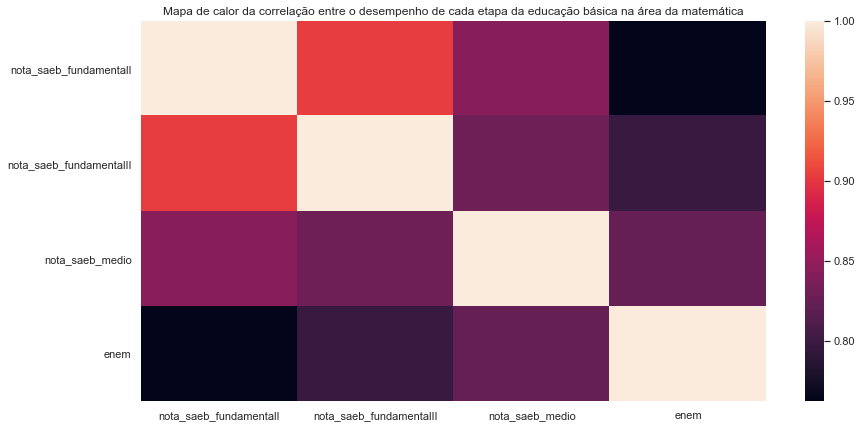

In [54]:
sns.set(rc={'figure.figsize':(14, 7)})
ax = sns.heatmap(portugues_2019.corr())

ax.set(title = 'Mapa de calor da correlação entre o desempenho de cada etapa da educação básica na área da matemática') 

plt.show()

In [55]:
matematica_2019.corr() 
#base importa muito! mas quanto mais próximo, mais correlação esses dois exames têm em matemática. 
#em todos os casos a correlação é forte!

,nota_saeb_fundamentalI,nota_saeb_fundamentalII,nota_saeb_medio,enem
nota_saeb_fundamentalI,1.000000,0.898744,0.886296,0.827271
nota_saeb_fundamentalII,0.898744,1.000000,0.818798,0.754490
nota_saeb_medio,0.886296,0.818798,1.000000,0.835694
enem,0.827271,0.754490,0.835694,1.000000


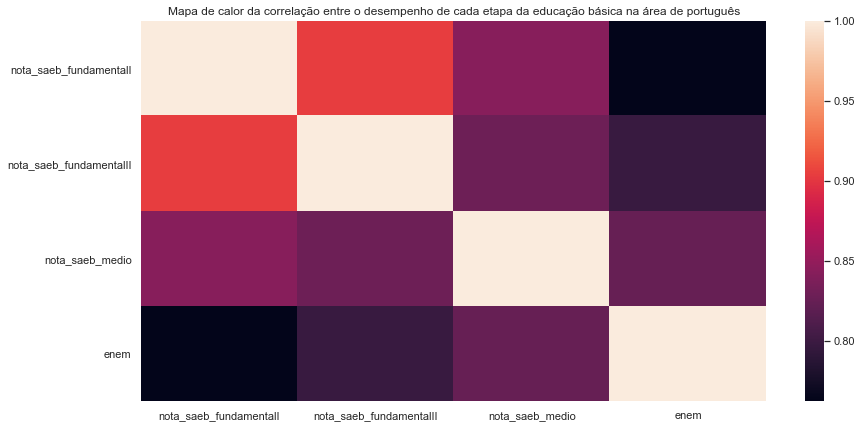

In [59]:
sns.set(rc={'figure.figsize':(14, 7)})
ax = sns.heatmap(portugues_2019.corr())

ax.set(title = 'Mapa de calor da correlação entre o desempenho de cada etapa da educação básica na área de português') 

plt.show()

In [57]:
redacao_2019.corr() #redação não tem tanta correlação com estudar português - correlação moderada (!!!)

,nota_saeb_fundamentalI,nota_saeb_fundamentalII,nota_saeb_medio,enem
nota_saeb_fundamentalI,1.000000,0.904112,0.843646,0.623347
nota_saeb_fundamentalII,0.904112,1.000000,0.828582,0.497985
nota_saeb_medio,0.843646,0.828582,1.000000,0.659616
enem,0.623347,0.497985,0.659616,1.000000


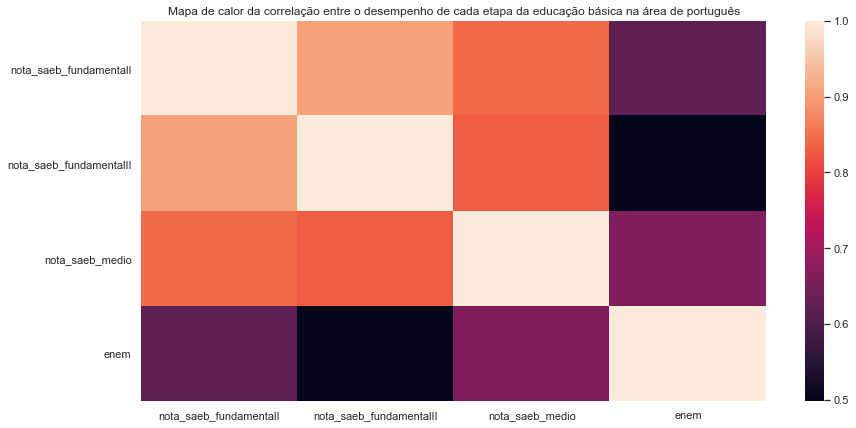

In [60]:
sns.set(rc={'figure.figsize':(14, 7)})
ax = sns.heatmap(redacao_2019.corr())

ax.set(title = 'Mapa de calor da correlação entre o desempenho de cada etapa da educação básica na área de português') 

plt.show()

### Conclusão: Estudo de base sólido tem uma correlação forte no desempenho do enem. Naturalmente, quão mais próximas temporamente elas forem, mais forte será o impacto. Vemos que isso especialmente se dá em matemática, que é uma matéria cheia de pré-requisitos, os quais sem eles, o aluno pode se perder conforme o tempo passa e não só se desinteressar na matéria, mas também não assimilar novos conhecimentos. Embora o português não tenha esse caráter, ainda é de forte correlação o quanto o estado dedica nos ensinos primários e seu desempenho no ENEM. Finalmente, o estudo de base em português tem uma correlação moderada com as notas de redação do ENEM; talvez isso se dê pelo fato da redação do ENEM ter como apenas uma competência a gramática, representando 1/5 da nota. De forma geral, o resumo é que aqueles estados que se dedicam nos ensinos de base são recompensados com boas notas no ENEM.

# Explorando a base de dados do IDEB

## Importando as base de dados tratadas

In [16]:
ideb_2019_fundamentalI = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_fundamentalI_2019.csv',
                                     sep=';')
ideb_2019_fundamentalII = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_fundamentalII_2019.csv',
                           sep=';')
ideb_2019_medio = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\ideb_medio_2019.csv',
                           sep=';')

In [25]:
print(f"Fundamental I: {ideb_2019_fundamentalI.taxa_aprovacao.describe()}\n\nFundamental II: {ideb_2019_fundamentalII.taxa_aprovacao.describe()}\n\nMédio: {ideb_2019_medio.taxa_aprovacao.describe()}\n\n")

Fundamental I: count    27.000000
mean     88.855556
std       4.541461
min      78.500000
25%      86.450000
50%      89.200000
75%      92.000000
max      96.200000
Name: taxa_aprovacao, dtype: float64

Fundamental II: count    27.000000
mean     94.259259
std       2.586245
min      88.400000
25%      92.900000
50%      93.900000
75%      96.200000
max      98.500000
Name: taxa_aprovacao, dtype: float64

Médio: count    27.000000
mean     84.600000
std       5.205101
min      73.200000
25%      81.450000
50%      83.800000
75%      88.350000
max      93.500000
Name: taxa_aprovacao, dtype: float64




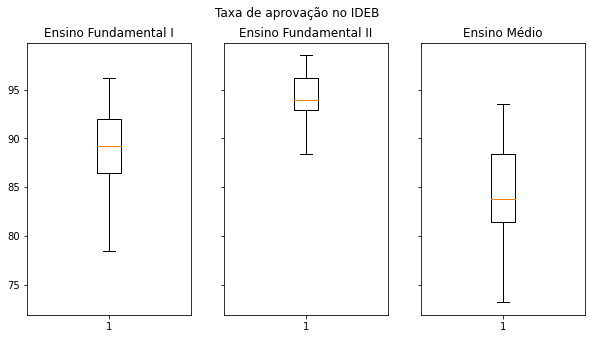

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# Criando um boxplot em cada subplot
axs[0].boxplot(ideb_2019_fundamentalI['taxa_aprovacao'])
axs[1].boxplot(ideb_2019_fundamentalII['taxa_aprovacao'])
axs[2].boxplot(ideb_2019_medio['taxa_aprovacao'])

# Personalizando o título e os rótulos dos eixos
axs[0].set_title('Ensino Fundamental I')
axs[1].set_title('Ensino Fundamental II')
axs[2].set_title('Ensino Médio')
fig.suptitle('Taxa de aprovação no IDEB')

plt.show()

### Não há outliers!

Text(0.5, 1.0, 'Taxa de aprovação do IDEB fundamental I por estado')

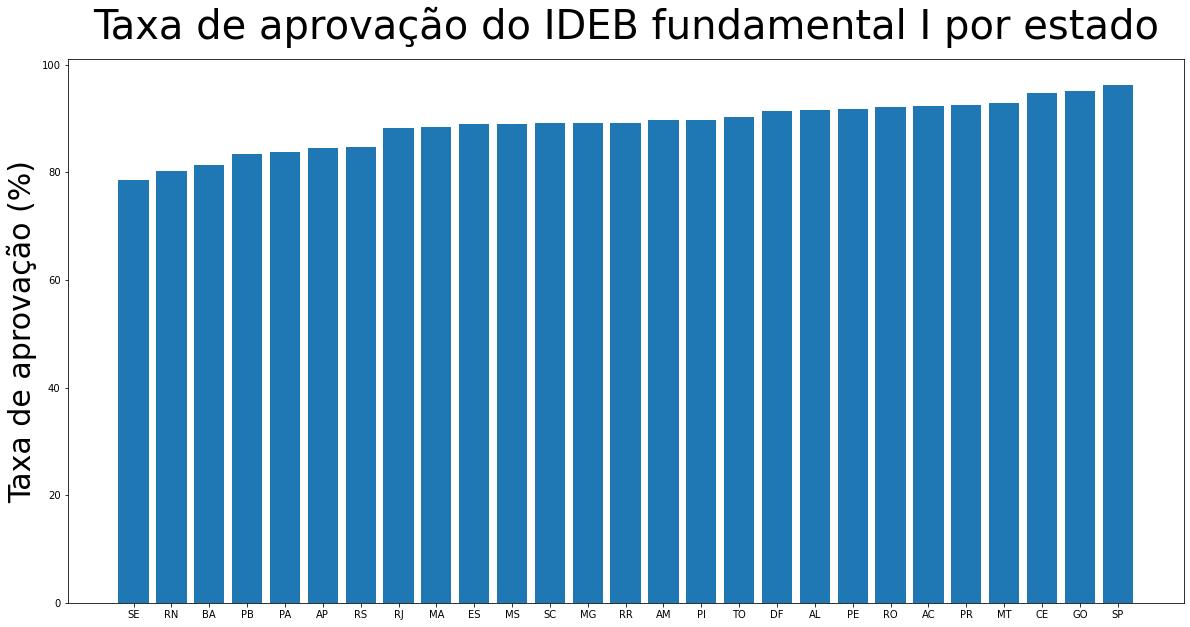

In [27]:
ideb_2019_fundamentalI_sorted = ideb_2019_fundamentalI.sort_values("taxa_aprovacao")

plt.rc('figure', figsize = (20, 10))

fig = plt.bar(ideb_2019_fundamentalI_sorted['sigla_uf'], ideb_2019_fundamentalI_sorted['taxa_aprovacao'])
plt.ylabel("Taxa de aprovação (%)", fontsize = 30)
plt.title("Taxa de aprovação do IDEB fundamental I por estado", fontsize = 40, pad = 20)

Text(0.5, 1.0, 'Taxa de aprovação do IDEB fundamental II por estado')

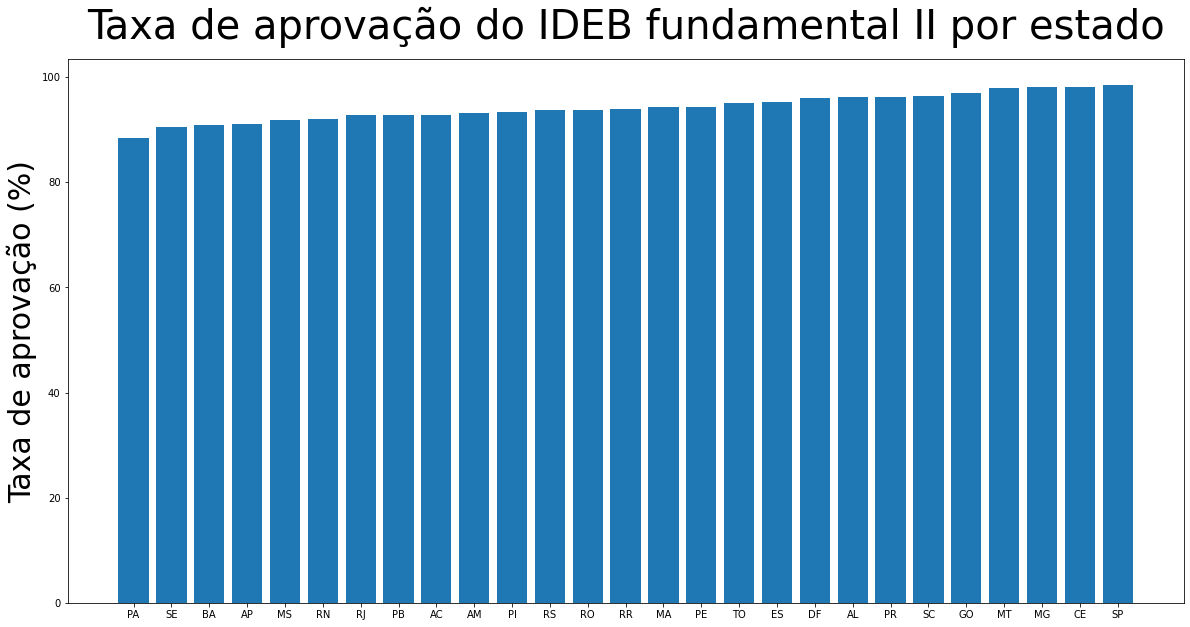

In [28]:
ideb_2019_fundamentalII_sorted = ideb_2019_fundamentalII.sort_values("taxa_aprovacao")

plt.bar(ideb_2019_fundamentalII_sorted['sigla_uf'], ideb_2019_fundamentalII_sorted['taxa_aprovacao'])
plt.ylabel("Taxa de aprovação (%)", fontsize = 30)
plt.title("Taxa de aprovação do IDEB fundamental II por estado", fontsize = 40, pad = 20)

Text(0.5, 1.0, 'Taxa de aprovação do IDEB no ensino médio por estado')

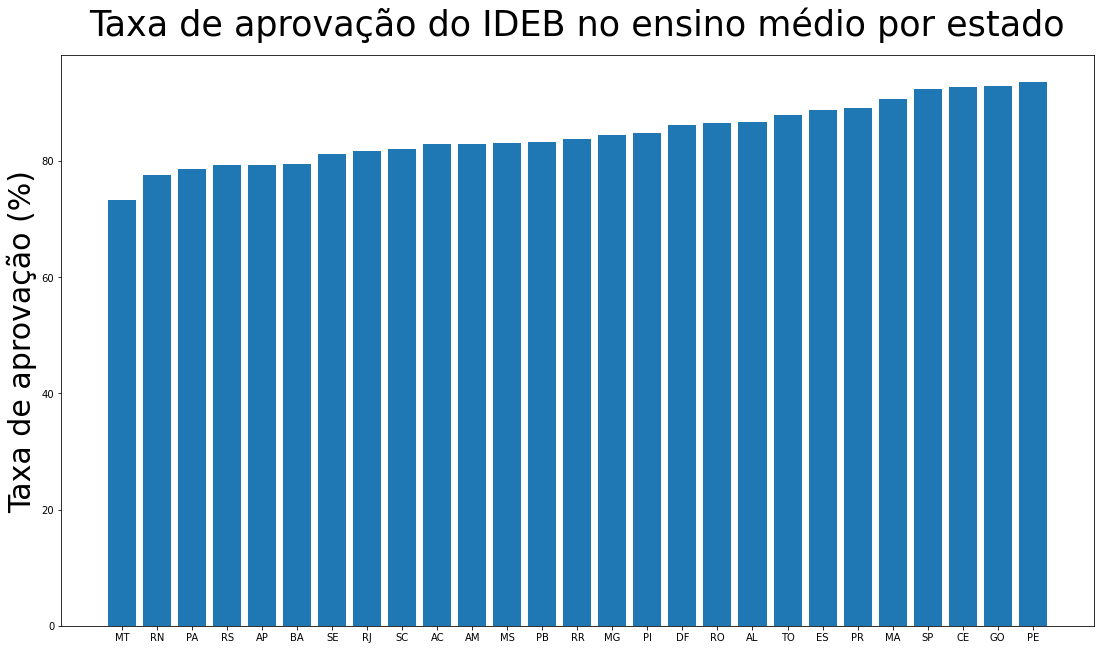

In [29]:
ideb_2019_medio_sorted = ideb_2019_medio.sort_values("taxa_aprovacao")

fig = plt.gcf()

fig.set_size_inches(18.5, 10.5)
plt.bar(ideb_2019_medio_sorted['sigla_uf'], ideb_2019_medio_sorted['taxa_aprovacao'])
plt.ylabel("Taxa de aprovação (%)", fontsize = 30)
plt.title("Taxa de aprovação do IDEB no ensino médio por estado", fontsize = 35, pad = 20)

# Explorando a base de dados do ENEM por gênero

## Importando base de dados

In [36]:
enem_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019.csv', sep = ',',
                        usecols = ['sexo', 'treineiro', 'nota_lc', 'nota_mt', 'nota_ct', 'nota_ch', 'estado'],
                        skiprows = lambda i: i > 0 and random.random() > 0.1)

## Removendo os treineiros e padronizando o nome das colunas

In [37]:
enem_2019 = enem_2019.drop(enem_2019[enem_2019.treineiro == 1].index) #removendo os treineiros ;)
enem_2019 = enem_2019.drop(columns = 'treineiro').rename(columns = {'estado': 'sigla_uf'}).dropna()
enem_2019

,sexo,nota_ct,nota_ch,nota_lc,nota_mt,sigla_uf
0,F,423.0,372.8,488.7,516.5,PA
1,F,496.8,475.1,544.9,537.8,PA
2,F,509.8,494.9,540.5,564.3,PA
4,F,450.9,436.6,489.1,408.4,PA
6,M,454.2,592.8,555.6,551.9,PA
...,...,...,...,...,...,...
508602,M,399.4,446.2,521.2,426.0,MG
508604,M,429.2,446.8,479.9,423.0,MG
508606,M,492.5,505.2,518.8,394.6,MG
508607,F,439.7,427.2,352.4,422.3,MG


## Agrupando por gênero

In [39]:
enem_2019['media'] = (enem_2019.nota_ct + enem_2019.nota_ch + enem_2019.nota_mt + enem_2019.nota_lc)/4
enem_2019

,sexo,nota_ct,nota_ch,nota_lc,nota_mt,sigla_uf,media
0,F,423.0,372.8,488.7,516.5,PA,450.250
1,F,496.8,475.1,544.9,537.8,PA,513.650
2,F,509.8,494.9,540.5,564.3,PA,527.375
4,F,450.9,436.6,489.1,408.4,PA,446.250
6,M,454.2,592.8,555.6,551.9,PA,538.625
...,...,...,...,...,...,...,...
508602,M,399.4,446.2,521.2,426.0,MG,448.200
508604,M,429.2,446.8,479.9,423.0,MG,444.725
508606,M,492.5,505.2,518.8,394.6,MG,477.775
508607,F,439.7,427.2,352.4,422.3,MG,410.400


In [72]:
enem_2019_genero = enem_2019.groupby(by='sexo')

In [73]:
for item, sexo in enem_2019_genero:
    print(enem_2019_genero.get_group(item))

       sexo  nota_ct  nota_ch  nota_lc  nota_mt sigla_uf    media
0         F    376.4    354.7    525.8    389.4       PA  411.575
2         F    412.5    417.2    485.1    446.2       PA  440.250
3         F    338.5    391.7    358.8    443.1       PA  383.025
4         F    496.8    475.1    544.9    537.8       PA  513.650
10        F    484.7    530.8    591.5    459.1       PA  516.525
...     ...      ...      ...      ...      ...      ...      ...
509694    F    386.9    543.5    409.5    364.1       MG  426.000
509696    F    379.8    468.2    504.1    416.5       MG  442.150
509699    F    491.6    549.3    586.8    633.5       MG  565.300
509700    F    456.6    419.2    447.2    446.5       MG  442.375
509701    F    486.7    457.8    506.7    488.5       BA  484.925

[186800 rows x 7 columns]
       sexo  nota_ct  nota_ch  nota_lc  nota_mt sigla_uf    media
7         M    432.6    418.2    438.2    599.7       PA  472.175
8         M    383.6    468.2    518.6    429.8  

In [95]:
enem_2019_genero.media.mean()

sexo
F    499.158857
M    518.628318
Name: media, dtype: float64

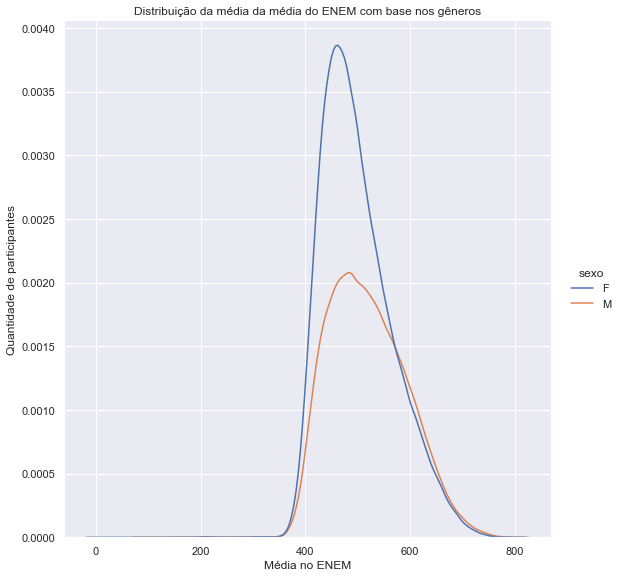

In [119]:
ax = sns.displot(data=enem_2019, x = 'media', height=8, kind='kde', hue='sexo')

ax.set(title ='Distribuição da média da média do ENEM com base nos gêneros', 
       xlabel='Média no ENEM', ylabel='Quantidade de participantes') 

# Separar os datasets em M e F

In [40]:
enem_2019_media_masculina = enem_2019.query("sexo == 'M'").media
enem_2019_media_feminina = enem_2019.query("sexo == 'F'").media

In [11]:
#H0: a média masculina se distribui de maneira normal
#H1: a média masculina não se distribui de maneira normal
_, p_valor = sp.normaltest(enem_2019_media_masculina)
if p_valor <= 0.05:
    print("Rejeitamos a hipótese nula, portanto a média masculina não se distribui de maneira normal")
else:
    print("Aceitamos a hipótese nula, portanto a média masculina se distribui de maneira normal")
print(p_valor)

Rejeitamos a hipótese nula, portanto a média masculina não se distribui de maneira normal
0.0


In [9]:
#H0: a média feminina se distribui de maneira normal
#H1: a média feminina não se distribui de maneira normal
_, p_valor = sp.normaltest(enem_2019_media_feminina)
if p_valor <= 0.05:
    print("Rejeitamos a hipótese nula, portanto a média feminina não se distribui de maneira normal")
else:
    print("Aceitamos a hipótese nula, portanto a média feminina se distribui de maneira normal")
print(p_valor)

Rejeitamos a hipótese nula, portanto a média feminina não se distribui de maneira normal
0.0


### Teremos que usar testes não-paramétricos

In [112]:
#H0: a média masculina é igual à média feminina
#H1: a média masculina é superior à média feminina
_, p_valor = sp.mannwhitneyu(enem_2019_media_masculina, enem_2019_media_feminina, alternative='greater')
if p_valor <= 0.05:
    print("Rejeitamos a hipótese nula, portanto a média masculina é significativamente superior à feminina")
else:
    print("Aceitamos a hipótese nula, portanto a média masculina é igual à feminina")

Rejeitamos a hipótese nula, portanto a média masculina é significativamente superior à feminina


# Número médio de horas semanais dedicadas aos cuidados de pessoas e/ou afazeres domésticos das pessoas de 14 anos ou mais de idade ocupadas na semana de referência por sexo segundo Unidades da Federação

In [29]:
trabalho_domestico = pd.read_excel(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\horas_dedicadas_trabalho_domestico.xlsx')
trabalho_domestico

,sigla_uf,M,F,total
0,RO,10.455863,17.276939,13.313733
1,AC,11.293393,18.125120,14.171297
2,AM,10.135388,15.302833,12.379501
3,RR,10.481230,16.770360,13.333006
4,PA,11.126516,20.677165,15.253443
5,AP,11.546557,15.814292,13.381713
6,TO,10.393480,17.072275,13.303377
7,MA,10.348905,18.691639,14.280477
8,PI,10.458465,20.612829,15.175482
9,CE,9.921540,18.998320,14.397897


In [30]:
trabalho_domestico_total = trabalho_domestico.loc[:, ['sigla_uf', 'M', 'F']].drop([27], 0).reset_index().drop(columns = 'index').set_index('sigla_uf')
trabalho_domestico_total

,M,F
sigla_uf,,
RO,10.455863,17.276939
AC,11.293393,18.125120
AM,10.135388,15.302833
RR,10.481230,16.770360
PA,11.126516,20.677165
AP,11.546557,15.814292
TO,10.393480,17.072275
MA,10.348905,18.691639
PI,10.458465,20.612829


# Unindo bases de dados

In [31]:
relacao_nota_trabalho_domestico = enem_2019.merge(trabalho_domestico_total, on='sigla_uf')
relacao_nota_trabalho_domestico

,sexo,nota_ct,nota_ch,nota_lc,nota_mt,sigla_uf,media,M,F
0,F,369.7,398.2,395.6,473.8,PA,409.325,11.126516,20.677165
1,F,373.3,405.2,441.4,496.5,PA,429.100,11.126516,20.677165
2,F,451.8,521.0,538.4,560.8,PA,518.000,11.126516,20.677165
3,M,460.7,570.5,541.8,631.3,PA,551.075,11.126516,20.677165
4,F,365.6,510.1,473.4,599.5,PA,487.150,11.126516,20.677165
...,...,...,...,...,...,...,...,...,...
318450,F,470.4,543.1,562.0,433.2,MT,502.175,8.801510,16.341790
318451,F,436.4,488.2,487.8,439.4,MT,462.950,8.801510,16.341790
318452,M,421.8,459.6,490.8,448.5,MT,455.175,8.801510,16.341790
318453,F,368.6,431.3,468.0,465.9,MT,433.450,8.801510,16.341790


In [32]:
relacao_nota_trabalho_domestico['horas_semanais_trabalho_domestico'] = np.where(relacao_nota_trabalho_domestico['sexo'] == 'M', 
                                                                                relacao_nota_trabalho_domestico['M'], 
                                                                                relacao_nota_trabalho_domestico['F'])
relacao_nota_trabalho_domestico.drop(columns = ['M','F'], inplace=True)

In [ ]:
relacao_nota_trabalho_domestico

In [33]:
relacao_nota_trabalho_domestico.groupby("sigla_uf").corr().query('horas_semanais_trabalho_domestico == 1.0')

,,nota_ct,nota_ch,nota_lc,nota_mt,media,horas_semanais_trabalho_domestico
sigla_uf,,,,,,,
AC,horas_semanais_trabalho_domestico,-0.142583,-0.080252,0.017234,-0.177639,-0.126080,1.0
AL,horas_semanais_trabalho_domestico,-0.132021,-0.089169,-0.025873,-0.175508,-0.134822,1.0
AM,horas_semanais_trabalho_domestico,-0.123455,-0.054235,0.007964,-0.169511,-0.112343,1.0
AP,horas_semanais_trabalho_domestico,-0.111701,-0.053783,0.009536,-0.161328,-0.105733,1.0
BA,horas_semanais_trabalho_domestico,-0.143277,-0.105043,-0.040845,-0.207018,-0.158811,1.0
CE,horas_semanais_trabalho_domestico,-0.111597,-0.060801,0.004708,-0.163797,-0.108278,1.0
DF,horas_semanais_trabalho_domestico,-0.126815,-0.103669,-0.034969,-0.182529,-0.142016,1.0
ES,horas_semanais_trabalho_domestico,-0.118527,-0.083360,-0.009997,-0.181735,-0.130213,1.0
GO,horas_semanais_trabalho_domestico,-0.117081,-0.071192,-0.007798,-0.175104,-0.121563,1.0


In [38]:
relacao_nota_trabalho_domestico.groupby("sigla_uf").corr().query('horas_semanais_trabalho_domestico == 1.0').describe().horas_semanais_trabalho_domestico

count    27.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: horas_semanais_trabalho_domestico, dtype: float64

[Text(0.5, 1.0, 'Distribuição da media do ENEM com base nas horas semanais médias trabalhadas em casa por estado e gênero'),
 Text(0.5, 0, 'Quantidade de horas dedicadas a afazeres domésticos na semana estudada'),
 Text(0, 0.5, 'Média simples da nota do ENEM')]

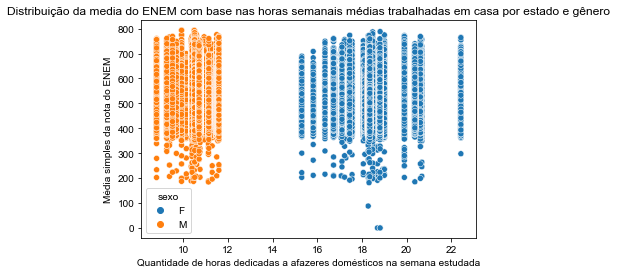

In [34]:
ax = sns.scatterplot(data=relacao_nota_trabalho_domestico, x='horas_semanais_trabalho_domestico', y='media', hue='sexo')

sns.set(rc={'figure.figsize':(15,10)})
ax.set(title ='Distribuição da media do ENEM com base nas horas semanais médias trabalhadas em casa por estado e gênero', 
       xlabel='Quantidade de horas dedicadas a afazeres domésticos na semana estudada', ylabel='Média simples da nota do ENEM') 

###  Minha hipótese era de que as notas mais baixas por parte da média das mulheres em relação aos homens era porque, no Brasil, mulheres dedicam mais horas com afazeres domésticos do que homens. Porém, como foi evidenciado no gráfico acima, a quantidade média de horas por estado não é suficiente para explicar a diferença das notas. Talvez se pudesse ser analisado individualmente a quantidade que cada pessoa levou se dedicando a afazeres doméstiocs ao invés de uma média generalista, o resultado fosse diferente. Porém, não foi o caso, então nada podemos concluir a partir disso

# Correlacionar renda com sucesso no ENEM


## Importando base de dados

In [39]:
enem_2019_renda_mensal = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019.csv',
                                     sep = ',', usecols = ['renda_mensal_familiar', 'treineiro', 'nota_lc', 'nota_mt', 'nota_ct',
                                                           'nota_ch'],
                                     skiprows = lambda i: i > 0 and random.random() > 0.1)

## Tratando base de dados

In [40]:
enem_2019_renda_mensal = enem_2019_renda_mensal.drop(enem_2019_renda_mensal[enem_2019_renda_mensal.treineiro == 1].index)
enem_2019_renda_mensal = enem_2019_renda_mensal.drop(columns = 'treineiro').rename(columns = {'estado': 'sigla_uf'}).dropna()
enem_2019_renda_mensal

,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt
0,998.00 até 1497.00,522.0,592.6,582.0,605.3
1,998.00 até 1497.00,376.4,354.7,525.8,389.4
2,<= 998.00,373.3,405.2,441.4,496.5
3,<= 998.00,422.1,534.4,516.3,585.2
4,Nenhuma Renda,484.7,530.8,591.5,459.1
...,...,...,...,...,...
508625,<= 998.00,533.3,485.8,530.2,595.5
508626,1996.00 até 2495.00,514.8,453.7,531.1,491.1
508627,6986.00 até 7984.00,491.6,549.3,586.8,633.5
508628,2994.00 até 3992.00,363.4,527.8,547.0,516.9


In [ ]:
enem_2019_renda_mensal.renda_mensal_familiar.unique()

In [ ]:
enem_2019_renda_mensal.renda_mensal_familiar.nunique()

In [46]:
enem_2019_renda = enem_2019_renda_mensal.replace({'Nenhuma Renda': 0, '<= 998.00': 1, '998.00 até 1497.00': 2, 
                                                      '1497.00 até 1996.00': 3, '1996.00 até 2495.00': 4,
                                                      '2495.00 até 2994.00': 5, '2994.00 até 3992.00': 6,
                                                      '3992.00 até 4990.00': 7, '4990.00 até 5988.00': 8,
                                                      '5988.00 até 6986.00': 9, '6986.00 até 7984.00': 10,
                                                      '7984.00 até 8982.00': 11, '8982.00 até 9980.00': 12,
                                                      '9980.00 até 11976.00': 13, '11976.00 até 14970.00': 14,
                                                      '14970.00 até 19960.00': 15, '>= 19960.00': 16}
                                                    )
enem_2019_renda
enem_2019_renda['media'] = (enem_2019_renda.nota_ct + enem_2019_renda.nota_ch + enem_2019_renda.nota_mt + enem_2019_renda.nota_lc)/4


## Exportando base de dados tratada

In [ ]:
enem_2019_renda.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_renda.csv',
                           sep=';', index=False, encoding='utf-8-sig')

## Importando base de dados tratada

In [2]:
enem_2019_renda = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_renda.csv',
                           sep=';', encoding='utf-8-sig')
enem_2019_renda

,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,media
0,2,522.0,592.6,582.0,605.3,575.475
1,2,376.4,354.7,525.8,389.4,411.575
2,1,373.3,405.2,441.4,496.5,429.100
3,1,422.1,534.4,516.3,585.2,514.500
4,0,484.7,530.8,591.5,459.1,516.525
...,...,...,...,...,...,...
316325,1,533.3,485.8,530.2,595.5,536.200
316326,4,514.8,453.7,531.1,491.1,497.675
316327,10,491.6,549.3,586.8,633.5,565.300
316328,6,363.4,527.8,547.0,516.9,488.775


## Gerando gráficos

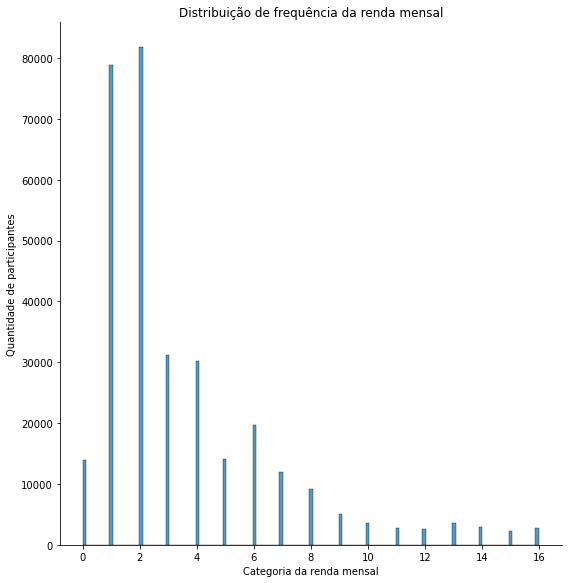

In [4]:
ax = sns.displot(enem_2019_renda['renda_mensal_familiar'], height=8)

ax.set(title ='Distribuição de frequência da renda mensal', 
       xlabel='Categoria da renda mensal', ylabel='Quantidade de participantes')

[Text(0.5, 1.0, 'Gráfico de dispersão da média em relação a renda familiar mensal'),
 Text(0.5, 0, 'Renda familiar mensal (em R$)'),
 Text(0, 0.5, 'Média aritimética do ENEM')]

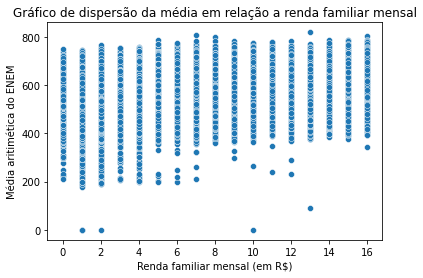

In [5]:
ax = sns.scatterplot(enem_2019_renda['renda_mensal_familiar'], enem_2019_renda['media'])

ax.set(title ='Gráfico de dispersão da média em relação a renda familiar mensal', 
       xlabel='Renda familiar mensal (em R$)', ylabel='Média aritimética do ENEM') 

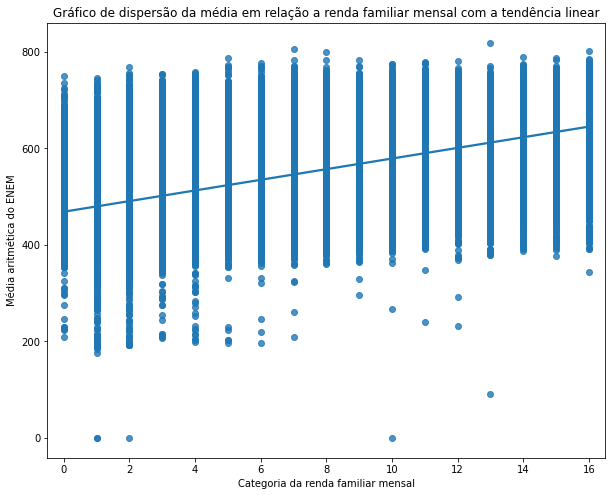

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(data=enem_2019_renda, x = "renda_mensal_familiar", y = 'media', ax = ax)
ax.set(title = 'Gráfico de dispersão da média em relação a renda familiar mensal com a tendência linear',
       xlabel = 'Categoria da renda familiar mensal', ylabel = 'Média aritmética do ENEM')
plt.xlim(-0.5, 16.5)
plt.show()

In [8]:
enem_2019_renda.corr()

,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,media
renda_mensal_familiar,1.000000,0.438844,0.415943,0.405334,0.468464,0.508003
nota_ct,0.438844,1.000000,0.670887,0.643951,0.651075,0.855422
nota_ch,0.415943,0.670887,1.000000,0.745879,0.613550,0.869442
nota_lc,0.405334,0.643951,0.745879,1.000000,0.590846,0.836795
nota_mt,0.468464,0.651075,0.613550,0.590846,1.000000,0.868072
media,0.508003,0.855422,0.869442,0.836795,0.868072,1.000000


### Explicação

# Escola pública vs privada

## Importando base de dados

In [25]:
ideb_2019 = bd.read_table(dataset_id='br_inep_ideb', table_id='uf', billing_project_id="analytica-desigualdade")
ideb_2019.drop(columns = "indicador_rendimento", inplace = True) #é a mesma coisa que a taxa de aprovação!

Downloading: 100%|██████████| 2629/2629 [00:00<00:00, 3429.24rows/s]


In [26]:
ideb_2019

,ano,sigla_uf,rede,ensino,anos_escolares,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,estadual,fundamental,finais (6-9),82.9,224.91,227.27,4.202988,3.5,NaN
1,2005,AC,estadual,fundamental,iniciais (1-5),78.4,169.19,166.80,4.229711,3.3,NaN
2,2005,AC,estadual,medio,todos (1-4),72.7,249.88,245.24,3.870503,3.0,NaN
3,2005,AC,privada,fundamental,finais (6-9),95.9,256.67,257.54,5.236878,5.0,NaN
4,2005,AC,privada,fundamental,iniciais (1-5),98.9,212.82,203.67,5.728825,5.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2624,2021,GO,privada,medio,todos (1-4),98.6,315.90,312.03,5.797420,5.7,NaN
2625,2021,GO,estadual,medio,todos (1-4),97.0,271.59,276.32,4.640507,4.5,NaN
2626,2021,DF,total,medio,todos (1-4),88.0,289.21,289.54,5.085884,4.5,NaN
2627,2021,DF,privada,medio,todos (1-4),98.9,338.39,322.12,6.264338,6.2,NaN


## Tratando base de dados

In [27]:
ideb_uf_2019 = ideb_uf.query("ano == 2019").drop(columns = 'ano')
ideb_2019_total = ideb_uf_2019.query("anos_escolares == 'todos (1-4)'").drop(columns = ['anos_escolares', 'ensino'])
ideb_2019_total = ideb_2019_total.query("rede != 'total'")
ideb_2019_total

,sigla_uf,rede,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
2081,AC,estadual,81.8,265.72,268.17,4.436058,3.7,4.6
2084,AC,privada,96.8,334.38,329.85,6.323886,6.1,6.9
2092,AL,estadual,86.0,255.24,260.64,4.176142,3.6,4.4
2095,AL,privada,95.3,304.00,302.14,5.482231,5.2,5.9
2103,AM,estadual,82.3,248.71,255.97,4.014518,3.5,3.8
2106,AM,privada,96.0,308.54,310.70,5.674279,5.5,6.5
2114,AP,estadual,76.7,248.72,256.64,4.024689,3.2,4.3
2117,AP,privada,97.7,301.70,299.51,5.410697,5.3,6.3
2125,BA,estadual,77.5,253.02,256.94,4.089573,3.2,4.3
2128,BA,privada,95.6,328.30,319.76,6.087436,5.9,6.7


## Gerando gráficos

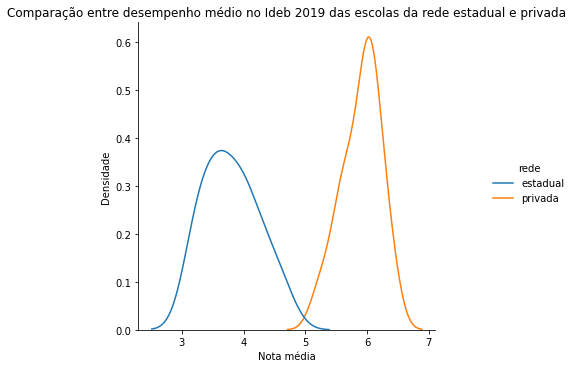

In [31]:
ax = sns.displot(data=ideb_2019_total, x='ideb', hue='rede', kind='kde')
ax.set(title ='Comparação entre desempenho médio no Ideb 2019 das escolas da rede estadual e privada', 
       xlabel='Nota média', ylabel='Densidade') 

## Testando hipóteses

In [50]:
#H0: a médias desta rede se distribui de maneira normal
#H1: a médias desta rede não se distribui de maneira normal
_, p1_valor = sp.normaltest(ideb_2019_total.query("rede == 'privada'").ideb)
_, p2_valor = sp.normaltest(ideb_2019_total.query("rede == 'estadual'").ideb)

if p1_valor <= 0.05 and p2_valor <= 0.05:
    print("Rejeitamos a hipótese nula, portanto uma das média das redes privadas ou estaduais se distribuiem de maneira normal")
else:
    print("Aceitamos a hipótese nula, portanto as médias das redes privadas e estaduais se distribuiem de maneira normal")

Aceitamos a hipótese nula, portanto as médias das redes privadas e estaduais se distribuiem de maneira normal


In [55]:
#H0: a média da rede estadual não é significativamente maior que a da rede pública
#H1: a média da rede estadual é significativamente maior que a da rede pública
_, p_valor = sp.ttest_ind(ideb_2019_total.query("rede == 'privada'").ideb, ideb_2019_total.query("rede == 'estadual'").ideb,
                           alternative = 'greater')
if p_valor <= 0.05:
    print("Rejeitamos a hipótese nula, portanto a média da rede estadual é significativamente maior que a da rede pública")
else:
    print("Aceitamos a hipótese nula, portanto a média da rede estadual não é significativamente maior que a da rede pública")

Rejeitamos a hipótese nula, portanto a média da rede estadual é significativamente maior que a da rede pública


# Capital vs Interior

## Importando base de dados

In [3]:
enem_2019 = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019.csv', sep = ',',
                        usecols = ['treineiro', 'nota_lc', 'nota_mt', 'nota_ct', 'nota_ch', 'municipio'],
                        skiprows = lambda i: i > 0 and random.random() > 0.1)
enem_2019

,treineiro,nota_ct,nota_ch,nota_lc,nota_mt,municipio
0,0,NaN,NaN,NaN,NaN,SÃO SEBASTIÃO DA BOA VISTA
1,0,NaN,NaN,NaN,NaN,BELÉM
2,0,NaN,NaN,NaN,NaN,ANANINDEUA
3,0,557.8,550.1,528.0,418.5,BELÉM
4,0,484.7,530.8,591.5,459.1,BELÉM
...,...,...,...,...,...,...
508617,0,NaN,NaN,NaN,NaN,ALFENAS
508618,0,NaN,NaN,NaN,NaN,ITABIRA
508619,0,375.7,468.3,457.8,387.1,JANAÚBA
508620,0,500.8,563.2,555.3,442.8,ITABIRITO


## Tratando base de dados

In [4]:
enem_2019 = enem_2019.drop(enem_2019[enem_2019.treineiro == 1].index) #removendo os treineiros ;)
enem_2019.drop(columns = 'treineiro', inplace = True)
enem_2019['media'] = (enem_2019.nota_ct + enem_2019.nota_ch + enem_2019.nota_mt + enem_2019.nota_lc)/4
enem_2019.dropna(inplace=True)
enem_2019

,nota_ct,nota_ch,nota_lc,nota_mt,municipio,media
3,557.8,550.1,528.0,418.5,BELÉM,513.600
4,484.7,530.8,591.5,459.1,BELÉM,516.525
5,550.8,618.4,606.8,635.5,MARABÁ,602.875
8,423.1,487.2,528.3,480.4,BELÉM,479.750
10,513.6,565.4,574.8,523.4,BELÉM,544.300
...,...,...,...,...,...,...
508615,440.3,467.1,544.0,482.1,MONTES CLAROS,483.375
508616,443.9,400.7,526.3,436.9,BELO HORIZONTE,451.950
508619,375.7,468.3,457.8,387.1,JANAÚBA,422.225
508620,500.8,563.2,555.3,442.8,ITABIRITO,515.525


In [5]:
capitais = ['JOÃO PESSOA', 'RIO DE JANEIRO', 'NATAL', 'RECIFE', 'TERESINA', 'BELÉM', 'PORTO VELHO', 'MANAUS', 'CUIABÁ', 'PALMAS',
            'SÃO PAULO', 'BRASÍLIA',  'SALVADOR', 'MACAPÁ', 'BOA VISTA', 'RIO BRANCO', 'CAMPO GRANDE', 'VITÓRIA', 'SÃO LUÍS', 
            'MACEIÓ', 'PORTO ALEGRE', 'CURITIBA', 'BELO HORIZONTE', 'FORTALEZA', 'FLORIANÓPOLIS', 'ARACAJU', 'GOIÂNIA']
enem_2019_capitais = enem_2019.query('municipio == @capitais')
enem_2019_interior = enem_2019.query('municipio != @capitais')
enem_2019_capitais.municipio.nunique()

27

## Exportando bases de dados tratadas

In [6]:
enem_2019_capitais.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_capitais.csv',
                          sep=';', index=False, encoding='utf-8-sig')
enem_2019_interior.to_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_interior.csv',
                          sep=';', index=False, encoding='utf-8-sig')

## Importando bases de dados tratadas

In [7]:
enem_2019_capitais = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_capitais.csv',
                                 sep=';', encoding='utf-8-sig')
enem_2019_interior = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documentos\Ciência_da_Computação\Analytica\Dados\enem_2019_interior.csv',
                                 sep=';', encoding='utf-8-sig')

In [21]:
print(f"Capitais: \n{enem_2019_capitais.media.describe()}\n\nInterior: \n{enem_2019_interior.media.describe()}")

Capitais: 
count    93817.000000
mean       517.528087
std         74.999452
min        187.275000
25%        459.175000
50%        506.300000
75%        568.275000
max        788.250000
Name: media, dtype: float64

Interior: 
count    223171.000000
mean        502.781577
std          68.405199
min           0.000000
25%         450.425000
50%         492.575000
75%         547.350000
max         812.825000
Name: media, dtype: float64


In [22]:
enem_2019_capitais.media.describe() - enem_2019_interior.media.describe()

count   -129354.000000
mean         14.746509
std           6.594253
min         187.275000
25%           8.750000
50%          13.725000
75%          20.925000
max         -24.575000
Name: media, dtype: float64

In [ ]:
enem_2019_capitais.municipio.nunique() / (enem_2019.municipio.nunique())*100

In [ ]:
enem_2019_capitais.municipio.count() / (enem_2019.municipio.count())*100

### Conclusão: Apesar das capitais brasileiras representarem 0.51% das cidades do Brasil, seus candidatos representam 29.64%, uma diferença de 29.13 pontos percentuais, indicando que 
(!!!) Mais pessoas moram nas capitais lol (!!!)

In [ ]:
_, p_valor = sp.normaltest(enem_2019.media)
if p_valor > 0.05:
    print("A média se distribui como uma variável normal")
else:
    print("A média não se distribui como uma variável normal")

In [ ]:
#H0: não existe diferença na média dos alunos da capital em relação ao interior (media_capital == media_interior)
#H1: a média dos alunos da capital é maior que a média dos alunos do interior   (media_capital != media_interior)
u, p_valor = sp.mannwhitneyu(enem_2019_capitais.media, enem_2019_interior.media, alternative = 'greater')
if p_valor <= 0.05:
    print("A média dos alunos da capital é significativamente maior do que a dos alunos do interior")
else:
    print("Não existe diferença significativa entre esses dois grupos")

### Conclusão: Rejeitamos a hipótese de que não existe diferença na média dos alunos da capital em relação ao interior, isto é, concluimos que a média dos alunos da capital é significativamente maior do que a dos alunos do interior. 